In [16]:
# This scripts performs a comprehensive analysis of the Olist
# e-commerce dataset to answer key business questions about
# products, customers, and logistics.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

In [18]:
# --- Analysis 1: Top Product Categories ---
def analyze_top_products(products, order_items, translation):
    """
    Analyzes and visualizes the top 10 best-selling product categories.
    """
    print("\n--- Starting Analysis 1: Top Product Categories ---")

    # Link products with their English category names.
    products_with_translation = pd.merge(products, translation, on='product_category_name')

    # Merge with order items to see what was sold.
    merged_df = pd.merge(order_items, products_with_translation, on='product_id')

    # Group by category, count orders, and get the average price.
    category_analysis = merged_df.groupby('product_category_name_english').agg(
        order_count=('order_id', 'count'),
        average_price=('price', 'mean')
    ).sort_values(by='order_count', ascending=False).head(10).reset_index()

    print("Top 10 Product Categories by Order Volume:")
    print(category_analysis)

    # Visualize the ranking with a bar chart.
    plt.figure(figsize=(12, 8))
   
    sns.barplot(x='order_count', y='product_category_name_english', data=category_analysis, palette='viridis', hue='product_category_name_english', legend=False)
    plt.title('Top 10 Best-Selling Product Categories', fontsize=16)
    plt.xlabel('Total Number of Orders', fontsize=12)
    plt.ylabel('Product Category', fontsize=12)
    plt.tight_layout()
    plt.show()


In [19]:
# --- Analysis 2: Customer Geographic Analysis ---
def analyze_customer_geography(customers, orders, payments):
    """
    Analyzes customer distribution and purchase value by state using interactive charts.
    """
    print("\n--- Starting Analysis 2: Customer & Geographic Insights ---")

    # Link customers to their orders and payments.
    customer_orders_df = pd.merge(customers, orders, on='customer_id')
    full_customer_df = pd.merge(customer_orders_df, payments, on='order_id')

    # Count the number of unique customers in each state.
    state_customer_count = full_customer_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10)
    
    print("Top 10 States by Number of Customers:")
    print(state_customer_count)

    # Create an interactive bar chart for customer count using Plotly Express
    fig1 = px.bar(
        state_customer_count,
        x=state_customer_count.index,
        y=state_customer_count.values,
        title='Top 10 States by Number of Customers',
        labels={'x': 'State', 'y': 'Number of Unique Customers'}
    )
    fig1.show()

    # Calculate the average purchase value for those top states.
    top_states = state_customer_count.index
    avg_purchase_by_state = full_customer_df[full_customer_df['customer_state'].isin(top_states)].groupby('customer_state')['payment_value'].mean().sort_values(ascending=False)

    print("\nAverage Purchase Value in Top 10 States:")
    print(avg_purchase_by_state)
    
    # Create another interactive bar chart for average purchase value
    fig2 = px.bar(
        avg_purchase_by_state,
        x=avg_purchase_by_state.index,
        y=avg_purchase_by_state.values,
        title='Average Purchase Value in Top States',
        labels={'x': 'State', 'y': 'Average Purchase Value (R$)'}
    )
    fig2.show()


In [20]:
# --- Analysis 3: Order Delivery Time Analysis ---
def analyze_delivery_times(orders, customers):
    """
    Analyzes the average order delivery time by customer state.
    """
    print("\n--- Starting Analysis 3: Logistics & Delivery Times ---")

    # Ensure the date columns are actual dates, not just text.
    date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date']
    for col in date_cols:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')

    # Calculate the delivery time in days.
    orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

    # Merge with customer data to get the state for each order.
    delivery_df = pd.merge(orders, customers, on='customer_id')

    # Clean the data - remove orders that haven't been delivered or have errors.
    delivery_df = delivery_df[delivery_df['delivery_time'].notna()]
    delivery_df = delivery_df[delivery_df['delivery_time'] > 0]

    # Find the average delivery time for each state.
    avg_delivery_by_state = delivery_df.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False).head(15)

    print("Top 15 States with Longest Average Delivery Time:")
    print(avg_delivery_by_state)

    # Plot the differences to see them clearly.
    plt.figure(figsize=(12, 9))
    sns.barplot(x=avg_delivery_by_state.values, y=avg_delivery_by_state.index, palette='rocket')
    plt.title('Average Order Delivery Time by State (Top 15 Longest)', fontsize=16)
    plt.xlabel('Average Delivery Time (in Days)', fontsize=12)
    plt.ylabel('Customer State', fontsize=12)
    plt.tight_layout()
    plt.show()

Loading datasets...
All files loaded successfully!

--- Starting Analysis 1: Top Product Categories ---
Top 10 Product Categories by Order Volume:
  product_category_name_english  order_count  average_price
0                bed_bath_table        11115      93.296327
1                 health_beauty         9670     130.163531
2                sports_leisure         8641     114.344285
3               furniture_decor         8334      87.564494
4         computers_accessories         7827     116.513903
5                    housewares         6964      90.788148
6                 watches_gifts         5991     201.135984
7                     telephony         4545      71.213978
8                  garden_tools         4347     111.630196
9                          auto         4235     139.957523


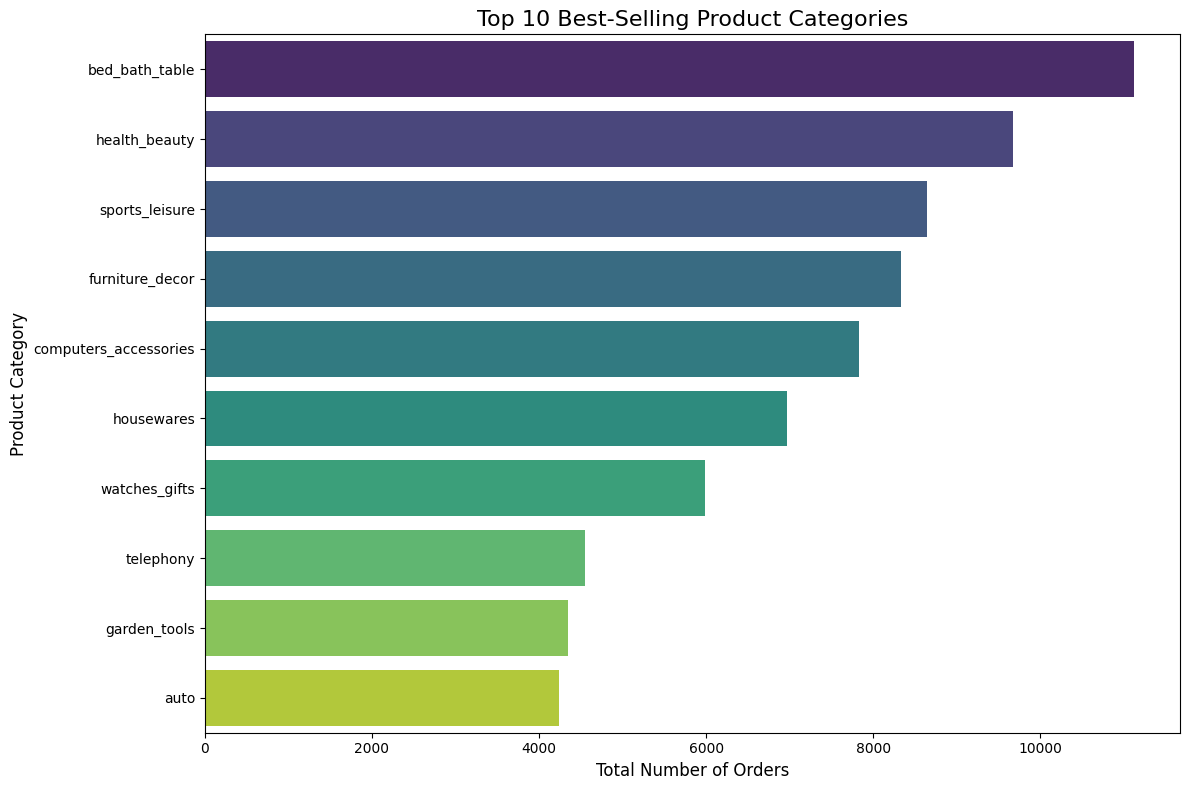


--- Starting Analysis 2: Customer & Geographic Insights ---
Top 10 States by Number of Customers:
customer_state
SP    41745
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64


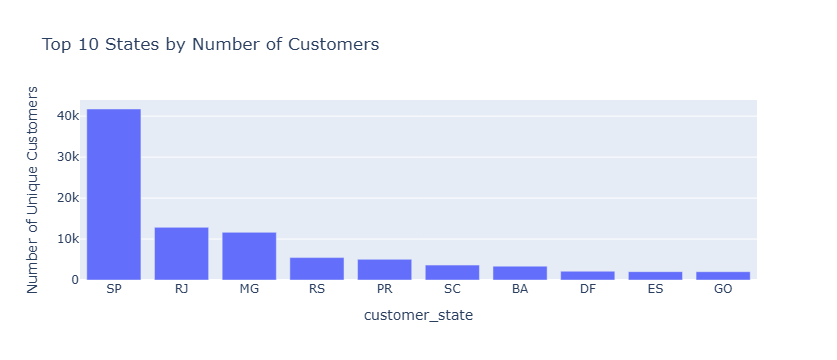


Average Purchase Value in Top 10 States:
customer_state
BA    170.816017
SC    165.979337
GO    165.763404
DF    161.134791
RJ    158.525888
RS    157.180406
ES    154.706953
MG    154.706434
PR    154.153626
SP    137.504630
Name: payment_value, dtype: float64


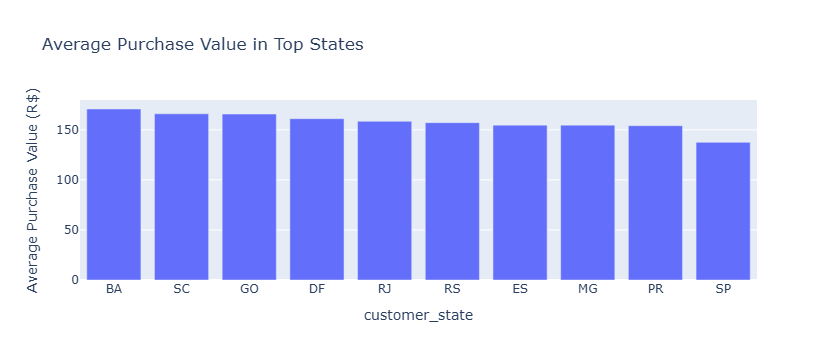


--- Starting Analysis 3: Logistics & Delivery Times ---
Top 15 States with Longest Average Delivery Time:
customer_state
RR    28.975610
AP    26.731343
AM    25.986207
AL    24.040302
PA    23.316068
MA    21.117155
SE    21.029851
CE    20.817826
AC    20.637500
PB    19.953578
PI    18.993697
RO    18.913580
BA    18.872197
RN    18.824895
PE    17.965474
Name: delivery_time, dtype: float64


C:\Users\yashr\AppData\Local\Temp\ipykernel_17680\2778225561.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




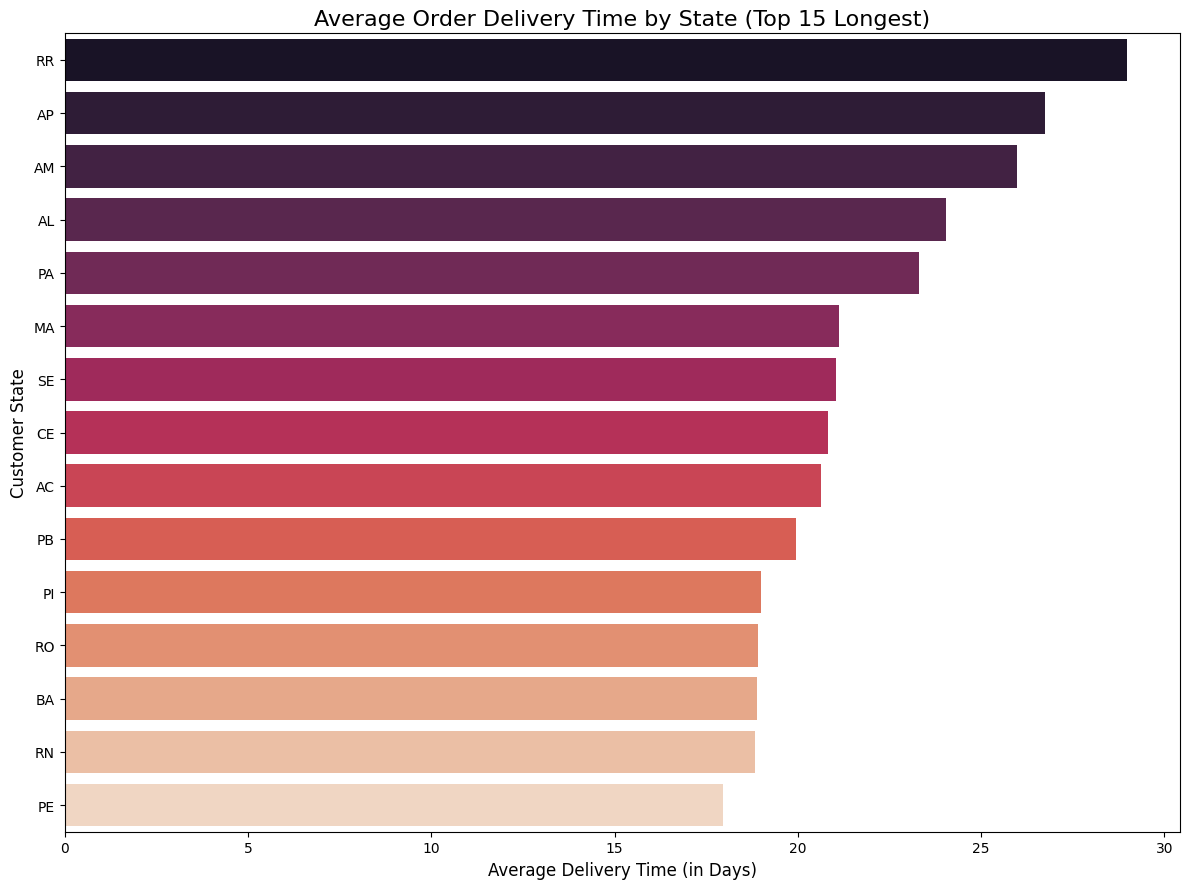


--- Analysis Complete ---


In [21]:

# --- Main script execution ---
if __name__ == "__main__":
    print("Loading datasets...")
    
    # This tells the script to look inside the 'Data' folder (with a capital D)
    data_folder = 'Data' 
    
    # We build the correct path for each file, e.g., "Data/olist_products_dataset.csv"
    data_files = {
        'products': f"{data_folder}/olist_products_dataset.csv",
        'order_items': f"{data_folder}/olist_order_items_dataset.csv",
        'translation': f"{data_folder}/product_category_name_translation.csv",
        'customers': f"{data_folder}/olist_customers_dataset.csv",
        'orders': f"{data_folder}/olist_orders_dataset.csv",
        'payments': f"{data_folder}/olist_order_payments_dataset.csv"
    }
    
    data = {}
    try:
        for name, file_path in data_files.items():
            data[name] = pd.read_csv(file_path)
        print("All files loaded successfully!")
    except FileNotFoundError as e:
        print(f"Error: {e}. Please double-check that the file names are spelled correctly inside your 'Data' folder.")
    
    # Run the analyses if data was loaded
    if data:
        analyze_top_products(data['products'], data['order_items'], data['translation'])
        analyze_customer_geography(data['customers'], data['orders'], data['payments'])
        analyze_delivery_times(data['orders'], data['customers'])
        
        print("\n--- Analysis Complete ---")